#### Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import requests
import seaborn as sns
#import beautifulsoup as bsp
from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases

# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

In [2]:
# To find encodings that work

# Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("C:/Users/User/Desktop/crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful latin_1
successful iso8859_2
successful iso8859_15
successful mac_roman
successful cp865
successful cp1125
successful cp1258
successful iso8859_7
successful cp775
successful cp037
successful cp1026
successful cp273
successful cp1252
successful iso8859_13
successful cp949
successful cp850
successful iso8859_6
successful mac_greek
successful mbcs
successful iso8859_5
successful cp857
successful cp1251
successful cp858
successful cp1250
successful koi8_r
successful cp1253
successful cp855
successful iso8859_10
successful gb18030
successful mac_latin2
successful big5hkscs
successful cp852
successful cp1256
successful cp932
successful cp1254
successful hp_roman8
successful cp860
successful gbk
successful utf_16_be
successful kz1048
successful cp864
successful mac_iceland
successful iso8859_3
successful ptcp154
successful iso8859_14
successful iso8859_8
successful iso8859_11
successful mac_turkish
successful cp869
successful cp500
successful iso8859_16
successful iso8859_4
success

In [3]:
# Reading the crime file from the desktop
crime_rates = pd.read_csv("C:/Users/User/Desktop/crime.csv", encoding="iso8859_6")

In [4]:
crime_rates.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,MONTH_NAME,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,Larceny All Others,D14,808,NaN,02/09/2018 13:00,2018,9,September,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,Vandalism,C11,347,NaN,21/08/2018 00:00,2018,8,August,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,Towed Motor Vehicle,D4,151,NaN,03/09/2018 19:27,2018,9,September,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,Investigate Property,D4,272,NaN,03/09/2018 21:16,2018,9,September,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,Investigate Property,B3,421,NaN,03/09/2018 21:05,2018,9,September,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [5]:
# getting the dimension of our dataset... 319073 rows, 18 columns
crime_rates.shape

(319073, 18)

In [6]:
# identifing the the total sum of null objects in our dataset
crime_rates.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
MONTH_NAME                  0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [7]:
# identifing the the total sum of duplicates in our dataset... 23 duplicates
crime_rates.duplicated().sum()

23

In [8]:
# deleting rows with duplicate values
crime_rates.drop_duplicates(inplace=True)

In [9]:
crime_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  MONTH_NAME           319050 non-null  object 
 11  DAY_OF_WEEK          319050 non-null  object 
 12  HOUR                 319050 non-null  int64  
 13  UCR_PART             318960 non-null  object 
 14  STREET               308179 non-null  object 
 15  Lat              

In [10]:
# getting info on the numeric columns of the dataset
crime_rates.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [11]:
# getting info on the non-numeric columns of the dataset
crime_rates.describe(include="object")

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,MONTH_NAME,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,319050,319050,318960,308179,319050
unique,282517,67,244,12,879,1,232566,12,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,Sick/Injured/Medical - Person,B2,,Y,01/06/2017 00:00,August,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,29,34821,48489,158537,14192,19998


In [12]:
# Changing the data type from object to datetime for the OCCURRED_ON_DATE column
crime_rates.OCCURRED_ON_DATE = pd.to_datetime(crime_rates.OCCURRED_ON_DATE)
crime_rates.OCCURRED_ON_DATE.info()

<class 'pandas.core.series.Series'>
Int64Index: 319050 entries, 0 to 319072
Series name: OCCURRED_ON_DATE
Non-Null Count   Dtype         
--------------   -----         
319050 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.9 MB


### Diving into Exploratory Data Analysis

- QUESTION ONE

- In which months were the number of crimes below average? 
- In which months on average did the most crimes occur?

In [13]:
# getting the average sum of crime per year
avg_crime = crime_rates.groupby(['YEAR', 'MONTH_NAME']).count()['INCIDENT_NUMBER'].mean()
print("Average crime rates per year is ", avg_crime)

Average crime rates per year is  7976.25


In [14]:
# getting the total number of crime per month for each year
year_and_month = crime_rates.groupby(['MONTH_NAME','YEAR']).count()['INCIDENT_NUMBER'].unstack()
year_and_month

YEAR,2015,2016,2017,2018
MONTH_NAME,,,,
April,NaN,8101.0,8069.0,7916.0
August,8340.0,8938.0,9206.0,8337.0
December,7987.0,7951.0,7535.0,NaN
February,NaN,7307.0,7408.0,6937.0
January,NaN,7835.0,7991.0,7782.0
July,8322.0,8618.0,9075.0,8538.0
June,4188.0,8558.0,8985.0,8834.0
March,NaN,8199.0,8179.0,7768.0
May,NaN,8578.0,8715.0,8906.0


In [15]:
# assigning the value of the average crime to a variable
avg_crime = 7976.25

In [16]:
# defining a function to highlight the value of crime below average the month 
def avg_crime_color(x):
    color = "blue" if (x < avg_crime) else None
    return "color: %s" % color

In [17]:
# declaring the columns to highlighted for the maximum numbers of crime committed per year
year_column = year_and_month.loc[:,:-1]

In [18]:
year_and_month.style.applymap(avg_crime_color)\
                    .highlight_max(subset=year_column,color="red")

# Values highlighted in blue are of crime_rates below average per year
# Value highlighted in red of max crime within a year

YEAR,2015,2016,2017,2018
MONTH_NAME,,,,
April,nan,8101.000000,8069.000000,7916.000000
August,8340.000000,8938.000000,9206.000000,8337.000000
December,7987.000000,7951.000000,7535.000000,nan
February,nan,7307.000000,7408.000000,6937.000000
January,nan,7835.000000,7991.000000,7782.000000
July,8322.000000,8618.000000,9075.000000,8538.000000
June,4188.000000,8558.000000,8985.000000,8834.000000
March,nan,8199.000000,8179.000000,7768.000000
May,nan,8578.000000,8715.000000,8906.000000


- QUESTION TWO

-  What are the most common crimes in terms of offense group?

In [19]:
# getting the most common crimes and their counts

most_common_crime = crime_rates.groupby(["OFFENSE_CODE_GROUP"]).count()\
    ["INCIDENT_NUMBER"].sort_values(ascending=False)
most_common_crime

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
Burglary - No Property Taken                     2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Name: INCIDENT_NUMBER, Length: 67, dtype: int64

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: INCIDENT_NUMBER, dtype: float64

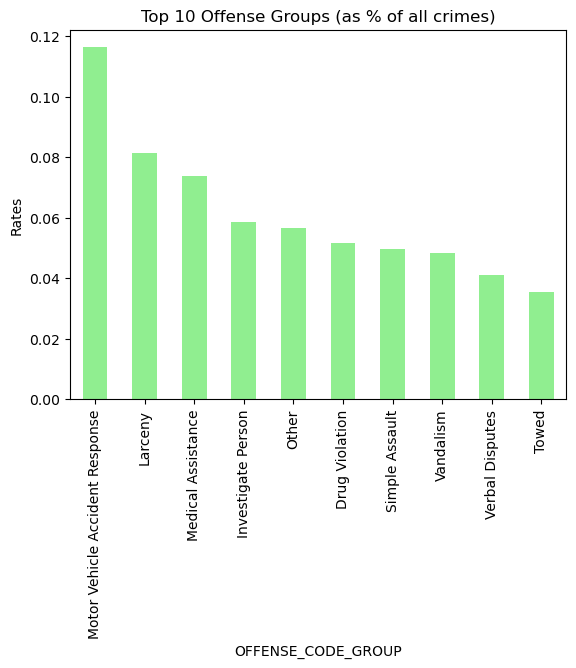

In [20]:
# Creating a bar chart of the Top 10 offense groups

display(most_common_crime[:10] / crime_rates.shape[0])

(most_common_crime[:10] / crime_rates.shape[0]).plot(kind='bar',color="lightgreen");
plt.ylabel("Rates")
plt.title('Top 10 Offense Groups (as % of all crimes)');

# The first 10 common crimes / the total number of crime committed

In [21]:
# Question 1 - What are the most common offense descriptions?
# Hint - Use value_counts() to print out the values

In [22]:
most_common_description = crime_rates.OFFENSE_DESCRIPTION.value_counts()
most_common_description

Sick/Injured/Medical - Person                  18783
Investigate Person                             18753
M/V - Leaving Scene - Property Damage          16323
Vandalism                                      15153
Assault Simple - Battery                       14791
                                               ...  
Killing Of Felon By Police                         1
Auto Theft - Outside - Recovered In Boston         1
Drugs - Glue Inhalation                            1
Robbery - Knife - Street                           1
Drugs - Poss Class D - Intent Mfr Dist Disp        1
Name: OFFENSE_DESCRIPTION, Length: 244, dtype: int64

Sick/Injured/Medical - Person            0.058872
Investigate Person                       0.058778
M/V - Leaving Scene - Property Damage    0.051161
Vandalism                                0.047494
Assault Simple - Battery                 0.046360
Verbal Dispute                           0.041056
Towed Motor Vehicle                      0.035377
Investigate Property                     0.034866
Larceny Theft From Building              0.028425
Threats To Do Bodily Harm                0.028340
Name: OFFENSE_DESCRIPTION, dtype: float64

Text(0.5, 1.0, 'Most Common Offense Description in Per')

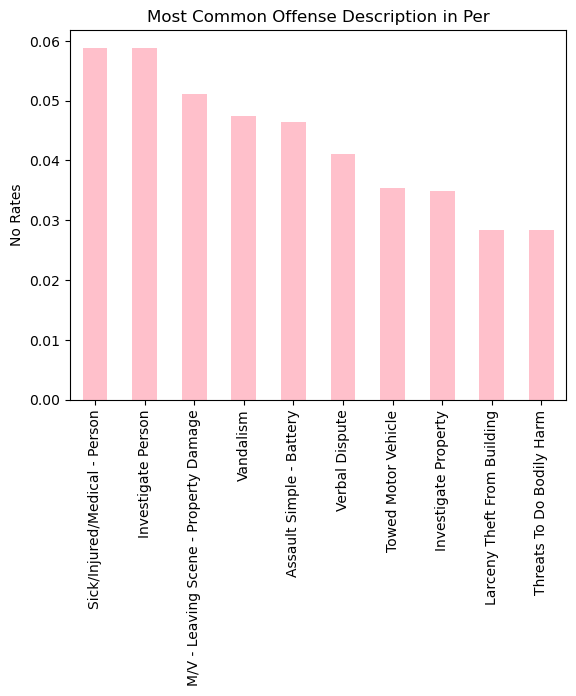

In [23]:
display(most_common_description[:10]/crime_rates.shape[0])

(most_common_description[:10]/crime_rates.shape[0]).plot(kind="bar",color="pink")
plt.ylabel("No Rates")
plt.title("Most Common Offense Description in Per")

In [24]:
# In which year were the most crimes committed?

In [25]:
crime_rates.OCCURRED_ON_DATE.dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [26]:
year_most_crime = crime_rates.groupby("YEAR").count()["INCIDENT_NUMBER"]
year_most_crime

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 0, 'Year Of Crime')

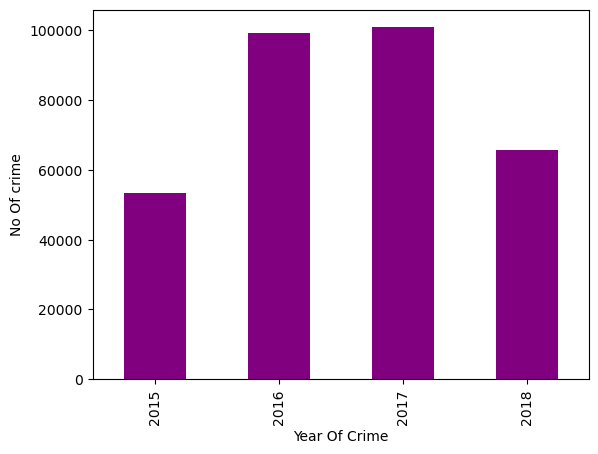

In [27]:
year_most_crime.plot(kind="bar", color="purple")
plt.ylabel("No Of crime")
plt.xlabel("Year Of Crime")

In [28]:
crime_rates.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'MONTH_NAME', 'DAY_OF_WEEK',
       'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [29]:
crime_rates.groupby("DAY_OF_WEEK").get_group("Friday").head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,MONTH_NAME,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
57,I182070872,1402,Vandalism,Vandalism,C6,205,NaN,2018-08-31 17:00:00,2018,8,August,Friday,17,Part Two,A ST,42.347543,-71.050662,"(42.34754258, -71.05066210)"
108,I182070817,3831,Motor Vehicle Accident Response,M/V - Leaving Scene - Property Damage,D14,788,NaN,2018-08-31 12:00:00,2018,8,August,Friday,12,Part Three,SUTHERLAND RD,42.340234,-71.148006,"(42.34023408, -71.14800614)"
122,I182070803,1402,Vandalism,Vandalism,B3,463,NaN,2018-08-17 12:10:00,2018,8,August,Friday,12,Part Two,BLUE HILL AVE,42.292165,-71.088970,"(42.29216506, -71.08896989)"
175,I182070746,1402,Vandalism,Vandalism,C11,462,NaN,2018-08-31 07:00:00,2018,8,August,Friday,7,Part Two,BULLARD ST,42.302188,-71.073650,"(42.30218780, -71.07365004)"
257,I182070639,3201,Property Lost,Property - Lost,D14,796,NaN,2018-08-31 22:00:00,2018,8,August,Friday,22,Part Three,LINDEN ST,42.351792,-71.130240,"(42.35179211, -71.13023989)"


Text(0, 0.5, 'Numbers Of Crime')

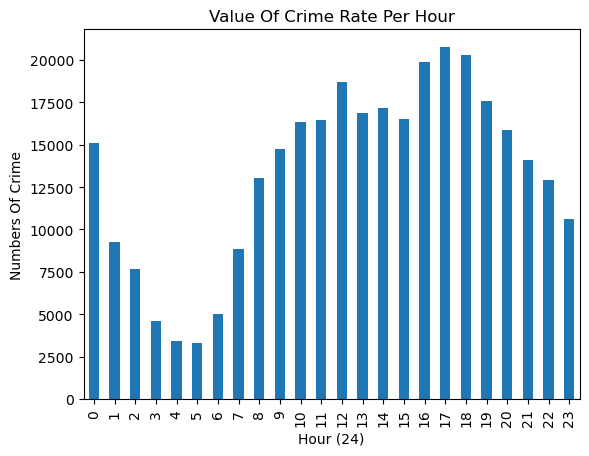

In [30]:
# Are there more crimes during specific hours?
crime_per_hour = crime_rates.groupby("HOUR")["INCIDENT_NUMBER"].count()
crime_per_hour.plot(kind="bar")
plt.title("Value Of Crime Rate Per Hour")
plt.xlabel("Hour (24)")
plt.ylabel("Numbers Of Crime")

In [31]:
days_hours_max_crime = crime_rates.groupby(["HOUR","DAY_OF_WEEK"])["INCIDENT_NUMBER"].count().unstack()
days_hours_max_crime
# getting the numbers of crimes per day by the hour they crimes were committed

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [32]:
days_hours_max_crime = days_hours_max_crime[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
# re-arranging or day of the week conventionally  

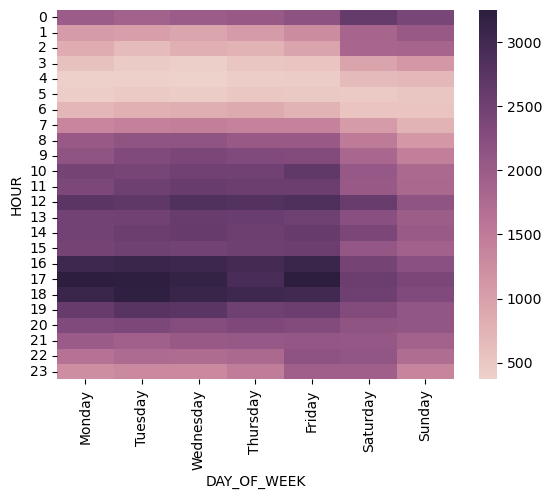

In [33]:
sns.heatmap(days_hours_max_crime,cmap=sns.cubehelix_palette(as_cmap=True));

In [34]:
district_crime_rate = crime_rates.groupby(["DISTRICT","YEAR"])["INCIDENT_NUMBER"].count()
district_crime_rate.unstack().style.highlight_max(color="red")
# District B2 has the highest crime rate for each year

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


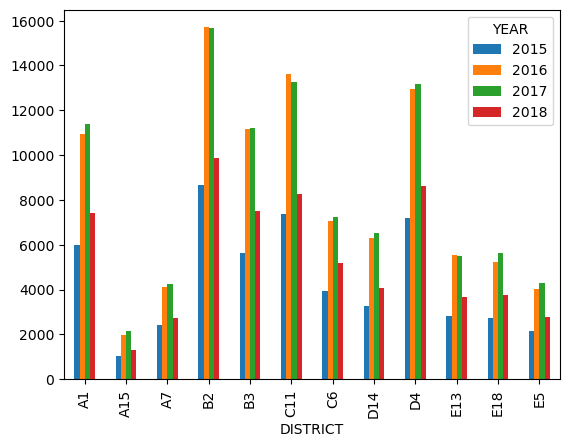

In [35]:
district = district_crime_rate.unstack().plot(kind="bar")
